In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model




In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [6]:
 #Encode target variable
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # M = 1, B = 0


In [7]:

print(df.isnull().sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

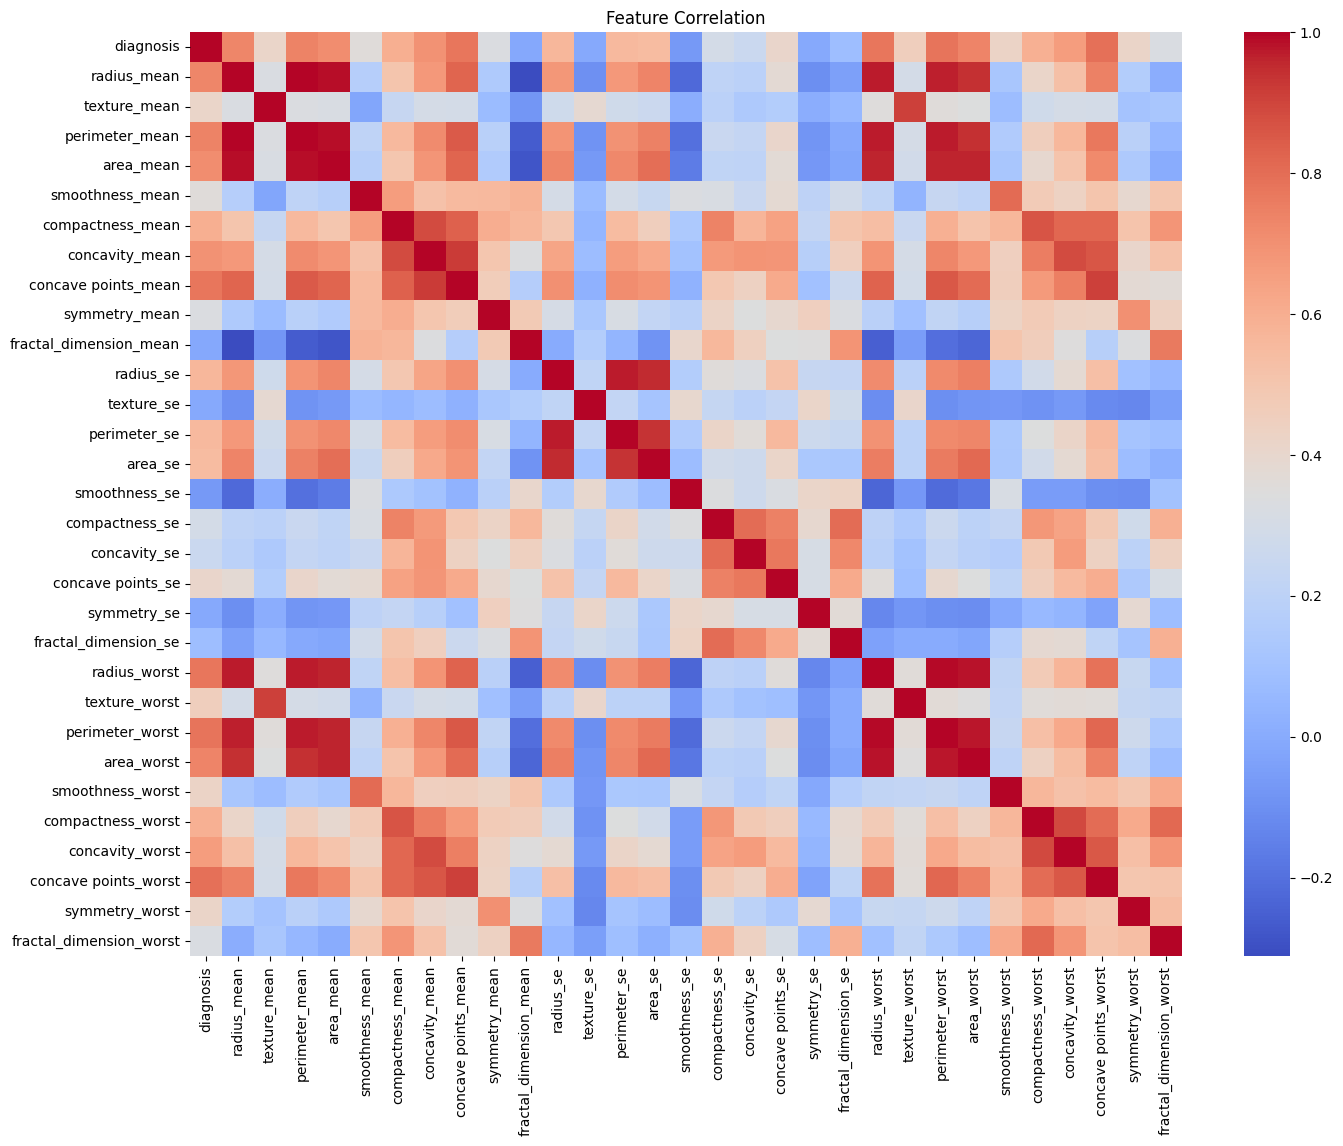

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [10]:
skewness = df.skew()
print("Skewness of each column:")
print(skewness)

high_skewness_threshold = 0.5
highly_skewed_features = skewness[abs(skewness) > high_skewness_threshold].index.tolist()

print(f"\nFeatures with absolute skewness > {high_skewness_threshold}:")
print(highly_skewed_features)

Skewness of each column:
diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
con

In [11]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

features_to_transform = [col for col in highly_skewed_features if col != 'diagnosis']
skewed_features_data = df[features_to_transform]

transformed_data = pt.fit_transform(skewed_features_data)

# Update only the transformed features in the original dataframe
df[features_to_transform] = transformed_data

print("Skewness after transformation:")
print(df.skew())

Skewness after transformation:
diagnosis                  0.528461
radius_mean                0.008176
texture_mean               0.000172
perimeter_mean             0.007262
area_mean                  0.005204
smoothness_mean            0.456324
compactness_mean           0.105564
concavity_mean             0.223924
concave points_mean        0.198740
symmetry_mean             -0.016675
fractal_dimension_mean     0.036216
radius_se                  0.194796
texture_se                 0.013032
perimeter_se               0.080793
area_se                    0.069306
smoothness_se              0.084004
compactness_se             0.204970
concavity_se               0.145901
concave points_se         -0.037805
symmetry_se                0.135894
fractal_dimension_se       0.234550
radius_worst               0.033651
texture_worst              0.498321
perimeter_worst            0.031123
area_worst                 0.026797
smoothness_worst           0.415426
compactness_worst          0.0916

In [12]:
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_counts[col] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(df)
print("Number of outliers for each column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of outliers for each column:
diagnosis: 0
radius_mean: 6
texture_mean: 2
perimeter_mean: 4
area_mean: 6
smoothness_mean: 6
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 8
fractal_dimension_mean: 0
radius_se: 0
texture_se: 1
perimeter_se: 0
area_se: 1
smoothness_se: 1
compactness_se: 0
concavity_se: 0
concave points_se: 17
symmetry_se: 1
fractal_dimension_se: 0
radius_worst: 1
texture_worst: 5
perimeter_worst: 1
area_worst: 1
smoothness_worst: 7
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 13
fractal_dimension_worst: 0


In [13]:
def remove_outliers(df):
    df_cleaned = df.copy()
    # Exclude 'diagnosis' from outlier removal
    cols_to_check = [col for col in df_cleaned.columns if col != 'diagnosis']
    for col in cols_to_check:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

df_cleaned = remove_outliers(df)

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_cleaned.shape)

Original DataFrame shape: (569, 31)
DataFrame shape after removing outliers: (516, 31)


In [14]:
outlier_counts_after = count_outliers(df_cleaned)
print("Number of outliers for each column after removal:")
for col, count in outlier_counts_after.items():
    print(f"{col}: {count}")

Number of outliers for each column after removal:
diagnosis: 0
radius_mean: 2
texture_mean: 1
perimeter_mean: 0
area_mean: 0
smoothness_mean: 2
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 0
fractal_dimension_mean: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 0
concave points_se: 0
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 1
perimeter_worst: 0
area_worst: 0
smoothness_worst: 2
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 0
fractal_dimension_worst: 0


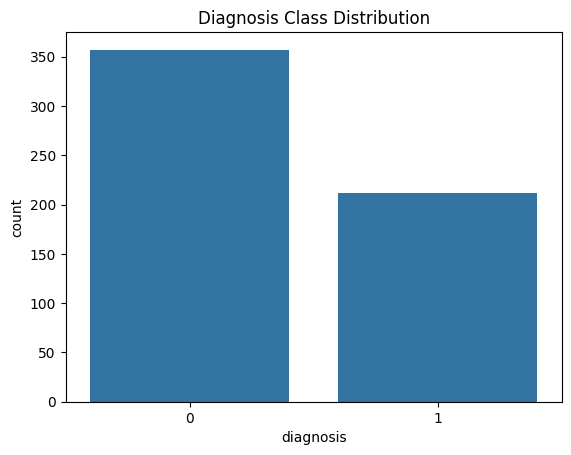

In [15]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Class Distribution')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)

print("\nClass distribution in original training data:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in resampled training data:")
print(pd.Series(y_train_resampled).value_counts())

Shape of original training data: (412, 30)
Shape of resampled training data: (520, 30)

Class distribution in original training data:
0    260
1    152
Name: count, dtype: int64

Class distribution in resampled training data:
0    260
1    260
Name: count, dtype: int64


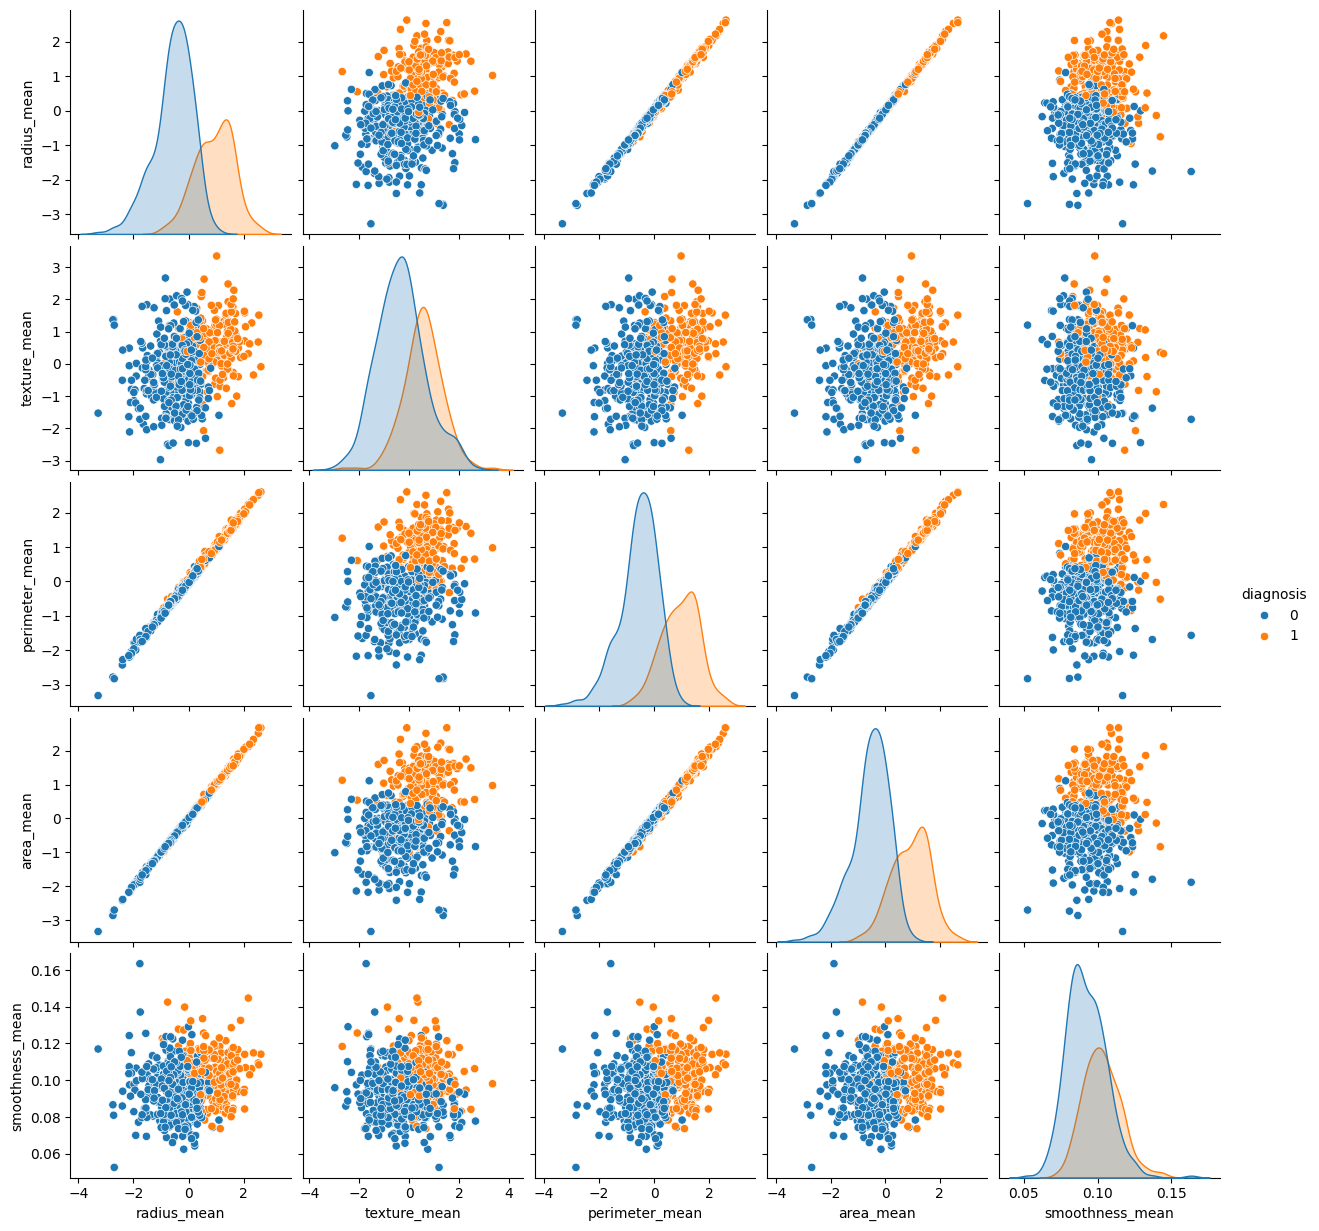

In [17]:
sns.pairplot(df.iloc[:, :6], hue='diagnosis')
plt.show()

In [18]:
correlation_matrix = df_cleaned.corr()
diagnosis_correlation = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)
print("Absolute Correlation with Diagnosis:")
print(diagnosis_correlation)

Absolute Correlation with Diagnosis:
diagnosis                  1.000000
concave points_mean        0.799016
concave points_worst       0.798293
perimeter_worst            0.797063
area_worst                 0.790359
radius_worst               0.789938
concavity_mean             0.750966
perimeter_mean             0.748944
area_mean                  0.738420
radius_mean                0.735254
area_se                    0.725250
concavity_worst            0.695883
radius_se                  0.646283
perimeter_se               0.637702
compactness_mean           0.599574
compactness_worst          0.597920
concave points_se          0.463656
texture_worst              0.455496
concavity_se               0.436368
texture_mean               0.430037
smoothness_worst           0.427294
symmetry_worst             0.412497
compactness_se             0.358432
smoothness_mean            0.350168
symmetry_mean              0.336115
fractal_dimension_worst    0.312313
fractal_dimension_se       

In [19]:
correlation_threshold = 0.6

important_features = diagnosis_correlation[diagnosis_correlation > correlation_threshold].index.tolist()
important_features = [feature for feature in important_features if feature != 'diagnosis']

print("Important features based on correlation threshold:")
print(important_features)

Important features based on correlation threshold:
['concave points_mean', 'concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst', 'concavity_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_worst', 'radius_se', 'perimeter_se']


In [20]:
X_important = df_cleaned[important_features]
y_important = df_cleaned['diagnosis']

X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y_important, test_size=0.2, random_state=42, stratify=y_important)

scaler = StandardScaler()
X_train_important = scaler.fit_transform(X_train_important)
X_test_important = scaler.transform(X_test_important)

print("Shape of X_train_important:", X_train_important.shape)
print("Shape of X_test_important:", X_test_important.shape)
print("Shape of y_train_important:", y_train_important.shape)
print("Shape of y_test_important:", y_test_important.shape)

Shape of X_train_important: (412, 13)
Shape of X_test_important: (104, 13)
Shape of y_train_important: (412,)
Shape of y_test_important: (104,)


In [21]:
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_important.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_important, y_train_important, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

loss, accuracy = model.evaluate(X_test_important, y_test_important, verbose=0)

y_pred_proba = model.predict(X_test_important)
y_pred = (y_pred_proba > 0.5).astype("int32")

y_test_important_int = y_test_important.astype(int)

print("\nClassification Report:")
print(classification_report(y_test_important_int, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_important_int, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.88      0.95      0.91        38

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104


Confusion Matrix:
[[61  5]
 [ 2 36]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate individual metrics
overall_accuracy = accuracy_score(y_test_important_int, y_pred)
macro_precision = precision_score(y_test_important_int, y_pred, average='macro')
macro_recall = recall_score(y_test_important_int, y_pred, average='macro')
macro_f1 = f1_score(y_test_important_int, y_pred, average='macro')
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Macro Average Precision: {macro_precision:.4f}")
print(f"Macro Average Recall: {macro_recall:.4f}")
print(f"Macro Average F1-score: {macro_f1:.4f}")



Overall Accuracy: 0.9327
Macro Average Precision: 0.9232
Macro Average Recall: 0.9358
Macro Average F1-score: 0.9286


In [23]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to model.pkl")

Model saved to model.pkl
